# ⚡ Electric Vehicle Population Dataset – Exploratory Data Analysis (EDA) 

The Electric Vehicle (EV) Population Dataset provides detailed information about electric vehicles registered in the state of Washington, USA. This dataset includes attributes such as vehicle make, model, year, type of electric vehicle (BEV or PHEV), electric range, CAFV eligibility, and geographic distribution across counties and cities.

In this project, we perform an Exploratory Data Analysis (EDA) to uncover patterns and trends in the adoption of electric vehicles. 

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud


## Step 2: Load the Dataset

In [2]:
df= pd.read_csv("E:\\Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


## Step 3: Basic Info & Summary of the Dataset

In [3]:
# Shape of the dataset
print("Shape of the dataset (rows, columns):", df.shape)

# Column-wise data types and non-null values
print("\nData Info:")
df.info()

# Summary statistics for numeric columns
print("\nStatistical Summary:")
(df.describe())


Shape of the dataset (rows, columns): (235692, 17)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Ve

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,235689.000000,235692.000000,235656.000000,235656.000000,235198.000000,2.356920e+05,2.356890e+05
mean,98177.656463,2021.406658,46.262569,787.268328,28.879519,2.353127e+08,5.298066e+10
std,2524.218661,2.991908,84.045829,7177.668305,14.904644,6.799098e+07,1.521066e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.053457e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.522795e+08,5.303303e+10
75%,98374.000000,2024.000000,38.000000,0.000000,42.000000,2.696401e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [4]:
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


## Step 4: Handle Missing Values (Final Clean)

 Let’s drop all the unwanted columns from our dataset in one go

In [5]:
columns_to_drop = [
    'VIN (1-10)', 'State', 'DOL Vehicle ID', 
    '2020 Census Tract', 'Postal Code', 'Base MSRP', 'Legislative District',
]
df = df.drop(columns=columns_to_drop)


In [6]:
df.isnull().sum()

County                                                3
City                                                  3
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                       36
Vehicle Location                                     10
Electric Utility                                      3
dtype: int64

In [7]:
# Drop rows with missing Electric Range and Vehicle Location
df = df.dropna(subset=['Electric Range', 'Vehicle Location'])


In [8]:
df.isnull().sum() # Re-check if any nulls left

County                                               0
City                                                 0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Vehicle Location                                     0
Electric Utility                                     0
dtype: int64

In [9]:
duplicates = df[df.duplicated()]

# Count of duplicate rows
print(f"Total duplicate rows: {duplicates.shape[0]}")

print(duplicates)

# Optional: Remove duplicates if needed
df_no_duplicates = df.drop_duplicates()

# Save cleaned file if required

Total duplicate rows: 169022
           County               City  Model Year   Make     Model  \
31         Yakima             Yakima        2018  TESLA   MODEL 3   
125     Snohomish            Bothell        2023  TESLA   MODEL Y   
165        Kitsap  Bainbridge Island        2019  TESLA   MODEL 3   
175          King            Seattle        2019  TESLA   MODEL 3   
205     Snohomish            Everett        2018  TESLA   MODEL 3   
...           ...                ...         ...    ...       ...   
235687     Pierce             Tacoma        2024   JEEP  WRANGLER   
235688  Snohomish           Stanwood        2018  TESLA   MODEL S   
235689       King            Redmond        2015   FORD    FUSION   
235690  Snohomish       Lake Stevens        2023   AUDI        Q4   
235691       King           Issaquah        2023    BMW        I4   

                         Electric Vehicle Type  \
31              Battery Electric Vehicle (BEV)   
125             Battery Electric Vehicle (

In [10]:
# Replace 0 values in 'Electric Range' with NaN first
df['Electric Range'] = df['Electric Range'].replace(0, pd.NA)

# Calculate the mean of 'Electric Range', ignoring NaN values
mean_electric_range = df['Electric Range'].mean()

# Replace NaN (which replaced the 0s) with the calculated mean
df['Electric Range'].fillna(mean_electric_range, inplace=True)

# Verify the changes
print(df['Electric Range'].head())  # Check the first few rows to confirm

0    220.000000
1    291.000000
2    113.690301
3     30.000000
4     42.000000
Name: Electric Range, dtype: float64


C:\Users\priya\AppData\Local\Temp\ipykernel_31760\3519492494.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electric Range'].fillna(mean_electric_range, inplace=True)
C:\Users\priya\AppData\Local\Temp\ipykernel_31760\3519492494.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Electric Range'].fi

In [11]:
# Extracting Longitude and Latitude from the 'Vehicle Location' column
df['Longitude'] = df['Vehicle Location'].apply(lambda x: float(x.split()[1][1:]) if pd.notnull(x) else np.nan)
df['Latitude'] = df['Vehicle Location'].apply(lambda x: float(x.split()[2][:-1]) if pd.notnull(x) else np.nan)

# Check the new columns
print(df[['Longitude', 'Latitude']].head())
df = df.drop(columns=['Vehicle Location'])


   Longitude  Latitude
0 -122.23825  47.49461
1 -122.64681  47.73689
2 -122.54729  47.42602
3 -122.81585  47.64509
4 -122.68993  46.88897


In [12]:
df #new modified dataframe after handling null values

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility,Longitude,Latitude
0,King,Seattle,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.000000,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.23825,47.49461
1,Kitsap,Poulsbo,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.000000,PUGET SOUND ENERGY INC,-122.64681,47.73689
2,Kitsap,Olalla,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,113.690301,PUGET SOUND ENERGY INC,-122.54729,47.42602
3,Kitsap,Seabeck,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.000000,PUGET SOUND ENERGY INC,-122.81585,47.64509
4,Thurston,Rainier,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.000000,PUGET SOUND ENERGY INC,-122.68993,46.88897
...,...,...,...,...,...,...,...,...,...,...,...
235687,Pierce,Tacoma,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.000000,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,-122.51134,47.29238
235688,Snohomish,Stanwood,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249.000000,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,-122.37265,48.24159
235689,King,Redmond,2015,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.000000,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),-122.13158,47.67858
235690,Snohomish,Lake Stevens,2023,AUDI,Q4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,113.690301,PUGET SOUND ENERGY INC,-122.06402,48.01497


## Step 5: Univariate Analysis (Statistical + Graphical)



Univariate analysis involves examining a single variable at a time to understand its distribution, central tendency, or frequency using statistics and visualizations (like counts, means, or bar plots).

Let’s analyze the average electric range and count of vehicles for each manufacturer:

Make
JAGUAR        213.033165
TESLA         145.575817
CHEVROLET     132.686638
POLESTAR      129.030120
RIVIAN        113.690301
BRIGHTDROP    113.690301
LUCID         113.690301
GMC           113.690301
GENESIS       113.690301
RAM           113.690301
Name: Electric Range, dtype: float64


C:\Users\priya\AppData\Local\Temp\ipykernel_31760\3799664842.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='magma')


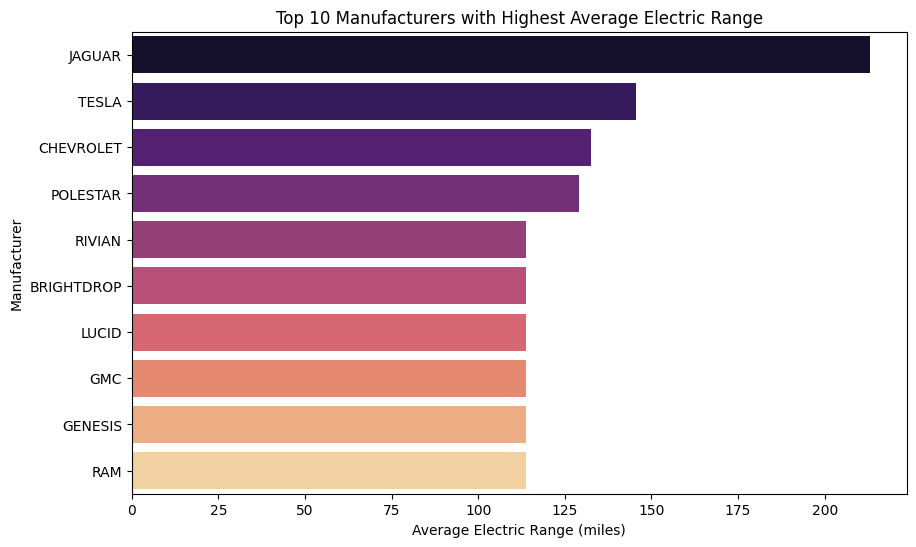

In [13]:
# Group by 'Make' (manufacturer) and calculate average electric range
top_manufacturers = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

# Display the data
print(top_manufacturers)

# Plot it
plt.figure(figsize=(10,6))
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='magma')
plt.title("Top 10 Manufacturers with Highest Average Electric Range")
plt.xlabel("Average Electric Range (miles)")
plt.ylabel("Manufacturer")
plt.show()


I grouped the data by each vehicle manufacturer (Make) and calculated the average electric range for each manufacturer. Then, I sorted the manufacturers in descending order and selected the top 10 manufacturers with the highest average electric range.

The bar chart highlights the top 10 manufacturers in terms of the average electric range of their vehicles. This visualization helps us identify the leading manufacturers in the electric vehicle market based on how far their vehicles can travel on a single charge.

Electric Vehicle Type
Battery Electric Vehicle (BEV)            186992
Plug-in Hybrid Electric Vehicle (PHEV)     48654
Name: count, dtype: int64


C:\Users\priya\AppData\Local\Temp\ipykernel_31760\3652092899.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ev_types.values, y=top_ev_types.index, palette='viridis')


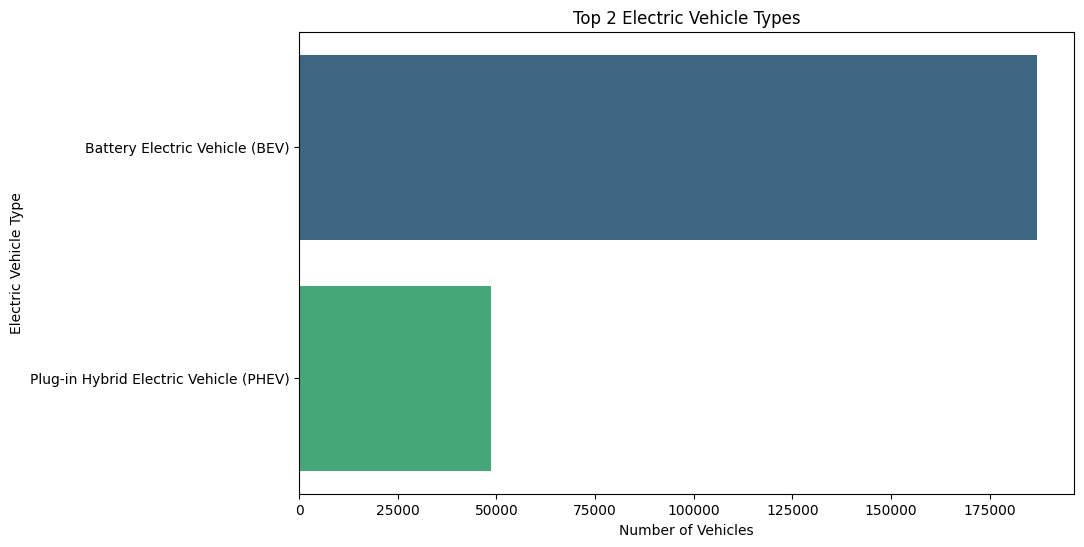

In [14]:
# Filter rows where the electric range is greater than 0 (indicating that the vehicle has an electric range)
ev_df = df[df['Electric Range'] > 0]

# Count the number of BEVs and PHEVs in the dataset
top_ev_types = ev_df['Electric Vehicle Type'].value_counts().head(10)

# Display the data
print(top_ev_types)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_ev_types.values, y=top_ev_types.index, palette='viridis')
plt.title("Top 2 Electric Vehicle Types")
plt.xlabel("Number of Vehicles")
plt.ylabel("Electric Vehicle Type")
plt.show()


This analysis shows how the electric vehicle market is divided between Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs). By visualizing this distribution, we can see which type of electric vehicle is more prevalent in the dataset, giving us insight into the trend of electric vehicle adoption.

## Model Year Distribution:

You can analyze how many cars are from each year by plotting the Model Year. This shows how the number of electric cars has changed over time.

Model Year
2000        7
2002        2
2003        1
2008       22
2010       23
2011      680
2012     1490
2013     4230
2014     3407
2015     4661
2016     5306
2017     8567
2018    14368
2019    10973
2020    12265
2021    20614
2022    28956
2023    59892
2024    49043
2025    11139
Name: count, dtype: int64


C:\Users\priya\AppData\Local\Temp\ipykernel_31760\535368443.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_year_distribution.index, y=model_year_distribution.values, palette='viridis')


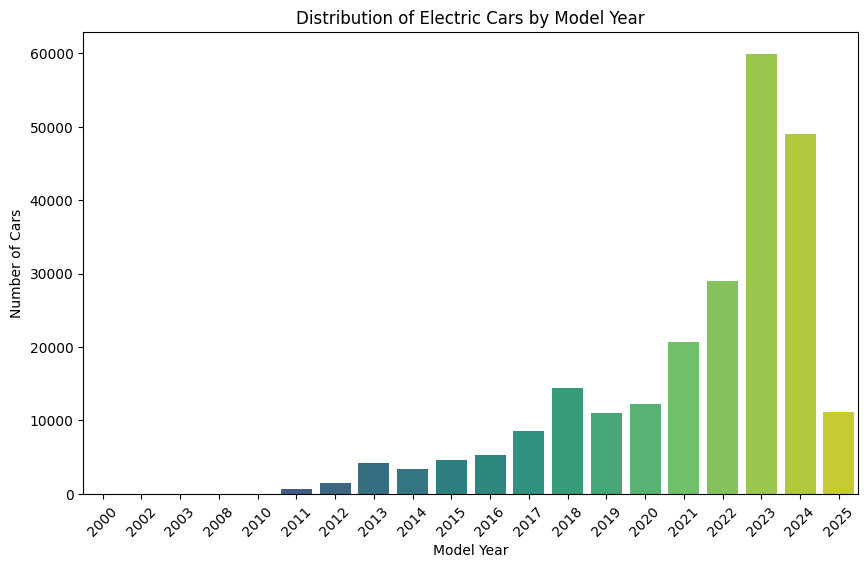

In [15]:
# Count the number of vehicles for each Model Year
model_year_distribution = df['Model Year'].value_counts().sort_index()

# Display the distribution
print(model_year_distribution)

# Plot the distribution
plt.figure(figsize=(10,6))
sns.barplot(x=model_year_distribution.index, y=model_year_distribution.values, palette='viridis')
plt.title("Distribution of Electric Cars by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


Electric car adoption is rapidly increasing, especially after 2020, reaching a peak in 2023. The dip in 2025 might be due to incomplete data collection for that year.

## Step 6: Bivariate Analysis (Statistical + Graphical)


let's focus on analyzing relationships between two variables in the dataset. I'll provide you with statistical and graphical methods that are relevant to the data you're working with

1. Electric Range vs. Model Year (Using Line Plot)



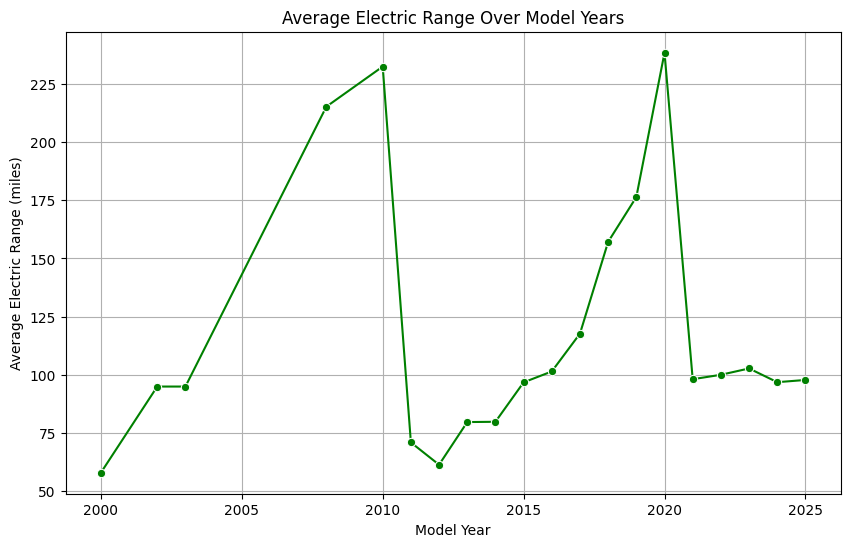

In [16]:
range_by_year = df.groupby('Model Year')['Electric Range'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=range_by_year.index, y=range_by_year.values, marker='o', color='green')
plt.title('Average Electric Range Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The electric vehicle market has stabilized at around 100 miles of range since 2021, following two decades of dramatic fluctuations that saw peaks of approximately 230-240 miles in 2010 and 2020, suggesting manufacturers have found an optimal balance between technology, cost, and consumer needs.

 2. Electric Vehicle Type vs. Average Range (Bar Plot)

C:\Users\priya\AppData\Local\Temp\ipykernel_31760\1234776675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_range_by_type.index, y=avg_range_by_type.values, palette='pastel')


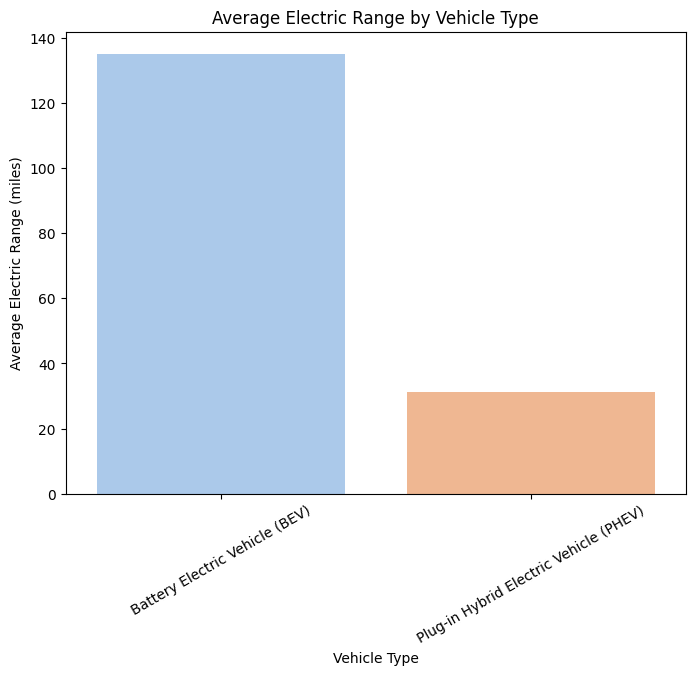

In [17]:
avg_range_by_type = df.groupby('Electric Vehicle Type')['Electric Range'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=avg_range_by_type.index, y=avg_range_by_type.values, palette='pastel')
plt.title('Average Electric Range by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=30)
plt.show()


Battery Electric Vehicles (BEVs) offer significantly greater average electric range at approximately 135 miles compared to Plug-in Hybrid Electric Vehicles (PHEVs) which average only about 30 miles of electric-only driving capability.

3. Count of Electric Vehicle Type by Year (Stacked Bar Plot)

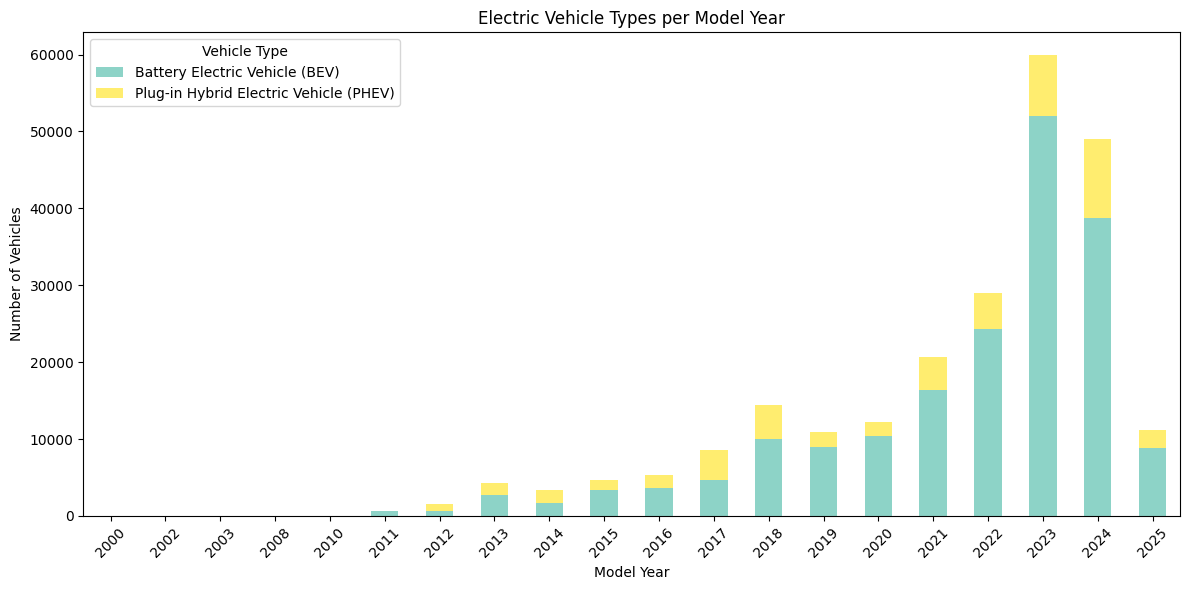

In [18]:
type_by_year = df.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0)

type_by_year.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title('Electric Vehicle Types per Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()


Electric vehicle adoption experienced exponential growth from negligible numbers in 2010 to a peak of approximately 60,000 vehicles in 2023, with Battery Electric Vehicles (BEVs) consistently outnumbering Plug-in Hybrid Electric Vehicles (PHEVs), before showing a significant decline in 2025.

 4. Electric Range vs. Make (Using Bar Plot – Top 10 Only)

C:\Users\priya\AppData\Local\Temp\ipykernel_31760\2257426829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_range_by_make.values, y=avg_range_by_make.index, palette='coolwarm')


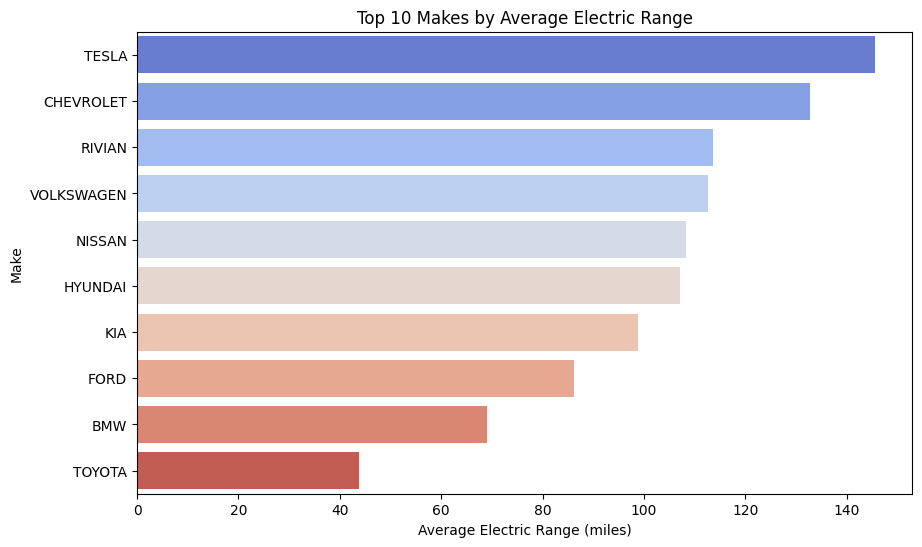

In [19]:
top_makes = df['Make'].value_counts().head(10).index
avg_range_by_make = df[df['Make'].isin(top_makes)].groupby('Make')['Electric Range'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_range_by_make.values, y=avg_range_by_make.index, palette='coolwarm')
plt.title('Top 10 Makes by Average Electric Range')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Make')
plt.show()


Tesla leads the electric vehicle market with significantly higher average electric range (approximately 145 miles), followed by Chevrolet (around 135 miles), while Toyota lags behind as the only manufacturer among the top 10 with less than 50 miles of average electric range, illustrating the substantial performance gap between industry leaders and laggards.

## Step 7: Multivariate Analysis (Statistical + Graphical)


1. Relationship between Model Year, Vehicle Type, and Average Electric Range

This graph shows how average electric range has changed over the years for different vehicle types (BEV vs PHEV).

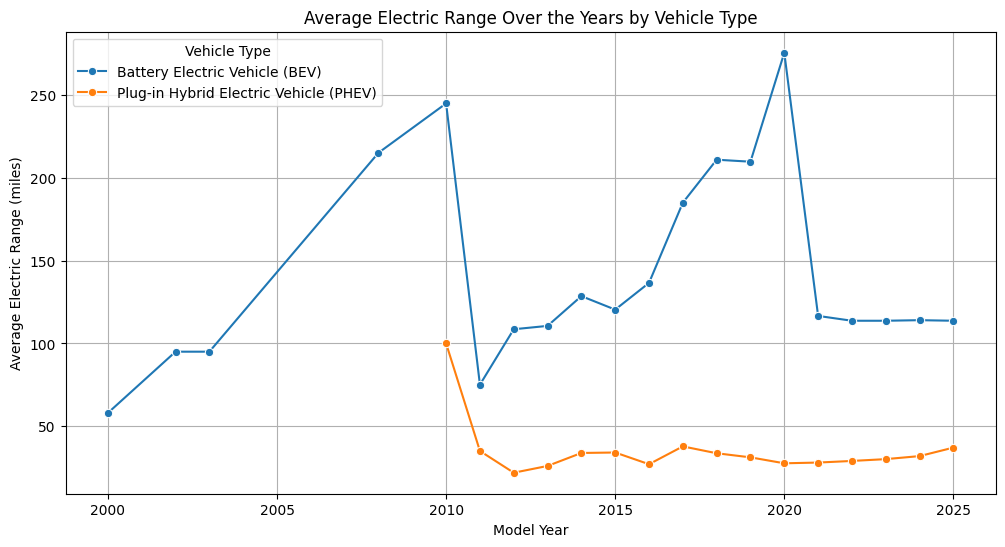

In [20]:
# Group by Model Year and Vehicle Type, calculate average range
avg_range = df.groupby(['Model Year', 'Electric Vehicle Type'])['Electric Range'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_range, x='Model Year', y='Electric Range', hue='Electric Vehicle Type', marker='o')
plt.title('Average Electric Range Over the Years by Vehicle Type')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()


* BEVs have seen a significant overall increase in average electric range, peaking around 2020-2022 at over 250 miles, but with a notable dip around 2015-2018 and a decline toward 100 miles by 2025.
* PHEVs started with a range below 50 miles, peaked around 2010-2012 at about 100 miles, then declined sharply before stabilizing at around 20-30 miles from 2015 onward, with a slight uptick by 2025.
* BEVs generally offer a higher average electric range than PHEVs, especially in recent years, though both vehicle types show fluctuations over time.

2. Influence of Make and Vehicle Type on Electric Range

This helps us compare how different manufacturers perform in terms of electric range across BEV and PHEV types.

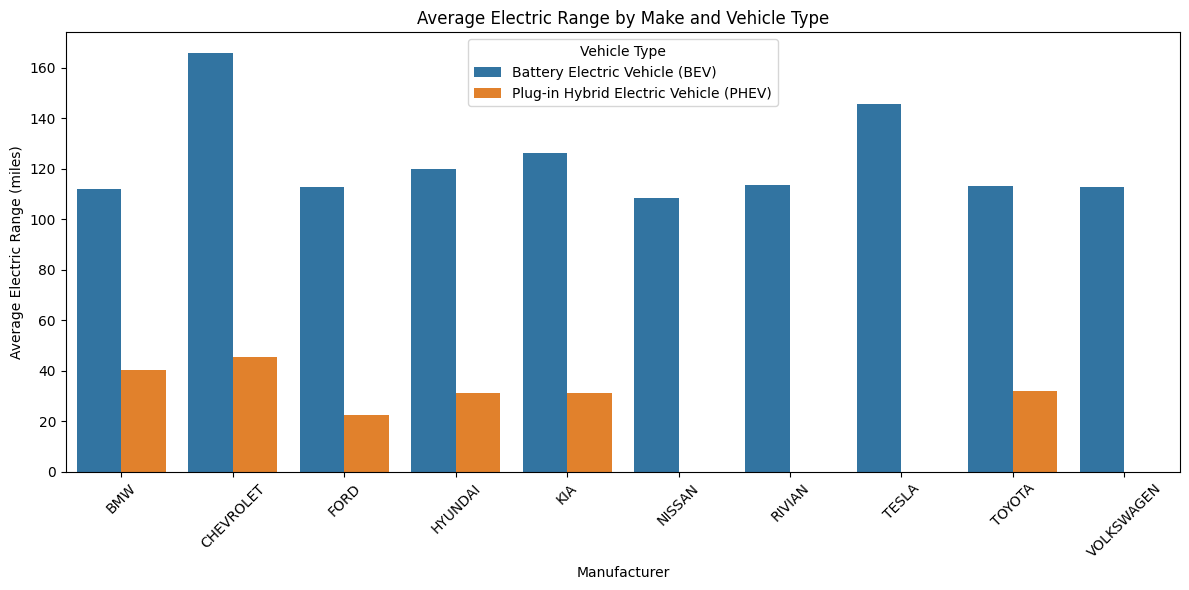

In [21]:
# Grouping by Make and Vehicle Type
make_type_range = df.groupby(['Make', 'Electric Vehicle Type'])['Electric Range'].mean().reset_index()

# Top 10 makes with most entries
top_makes = df['Make'].value_counts().head(10).index
filtered = make_type_range[make_type_range['Make'].isin(top_makes)]

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=filtered, x='Make', y='Electric Range', hue='Electric Vehicle Type')
plt.title('Average Electric Range by Make and Vehicle Type')
plt.xlabel('Manufacturer')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()


1. BEVs (Blue Bars):
* Chevrolet has the highest BEV range at around 160 miles, followed by Tesla and Rivian at around 140 miles.
* Most manufacturers (BMW, Ford, Hyundai, Kia, Nissan, Toyota, Volkswagen) have BEV ranges between 100-120 miles.

2. PHEVs (Orange Bars):
* PHEV ranges are significantly lower, with BMW and Chevrolet leading at around 40 miles, while others (Ford, Hyundai, Kia, Toyota) range between 20-30 miles.
* Tesla, Rivian, Nissan, and Volkswagen have no PHEV data shown.

Insights:

* BEVs consistently offer much higher electric ranges (100-160 miles) compared to PHEVs (20-40 miles) across all manufacturers.
* Chevrolet stands out with the highest BEV range, while PHEV ranges are relatively similar across brands, with BMW and Chevrolet slightly ahead.
* Manufacturers like Tesla and Rivian focus solely on BEVs with competitive ranges, while others offer both vehicle types with PHEVs having notably shorter ranges.

3. Distribution of Electric Range by Model Year and CAFV Eligibility


This shows how CAFV eligibility correlates with electric range across different years.

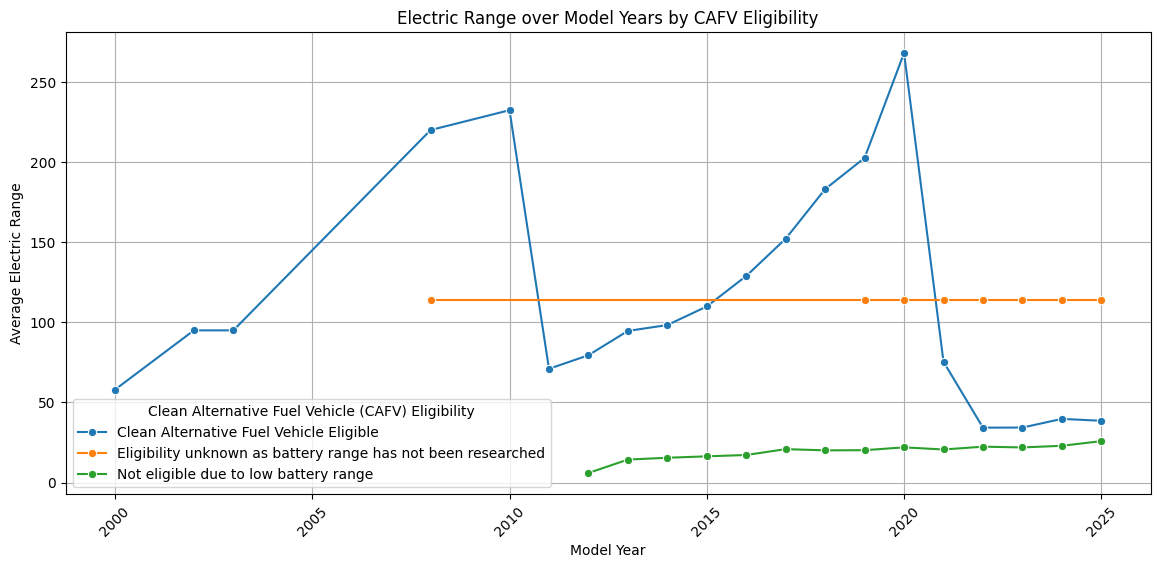

In [22]:
# Group by Model Year and CAFV Eligibility
cafv_range = df.groupby(['Model Year', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'])['Electric Range'].mean().reset_index()

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=cafv_range, x='Model Year', y='Electric Range', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', marker='o')
plt.title('Electric Range over Model Years by CAFV Eligibility')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


1. Clean Alternative Fuel Vehicle (CAFV) Eligibility (Blue Line):
* The range steadily increased from 2000 to around 2010, peaking at about 250 miles around 2018.
* There’s a sharp drop around 2020, likely due to a shift in eligible vehicle types or battery tech limitations, followed by a slight recovery but remaining below 100 miles by 2025.

2. Not Eligible Due to Low Battery Range (Green Line):
* This category remains consistently low, around 25-50 miles, showing that vehicles with insufficient range for CAFV eligibility haven’t seen significant improvements.

3. Eligibility Unknown as Battery Range Not Researched (Orange Dashed Line):
* This threshold hovers around 100 miles, indicating the minimum range typically required for CAFV eligibility.



Insights:

1. CAFV-eligible vehicles saw significant range improvements until 2018, but a decline post-2020 suggests possible changes in eligibility criteria, market focus (e.g., smaller batteries for cost), or technological setbacks.
2. Vehicles not eligible due to low range have stagnated, indicating a lack of innovation or focus in this segment.
3. The 100-mile threshold for CAFV eligibility seems to be a key benchmark, and many vehicles are struggling to meet it after 2020.

## Final Insight & Conclusion


Insights:

* EV adoption is growing, with model years up to 2025 and a mean of 2021.
* BEVs lead with higher ranges (max 337 miles, mean 46.26), while PHEVs stay lower (30-42 miles).
* CAFV-eligible ranges peaked at 250 miles in 2018 but dropped below 100 miles by 2025, possibly due to eligibility changes.
* Non-eligible vehicles stagnate at 25-50 miles.
* Key regions like King County and Seattle show high adoption.
* Data gaps (e.g., missing ranges, zero MSRP) limit some analyses.

Conclusion: EV adoption is rising, with BEVs outperforming PHEVs, but recent range declines suggest regulatory or tech challenges. Improvements in data and infrastructure are needed for sustained growth.
